In [33]:
#Import all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [34]:
#reading the file
df = pd.read_csv("creditcard.csv")

In [35]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [37]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [38]:
#dropping the time column
df.drop(columns = 'Time', inplace = True)

In [39]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

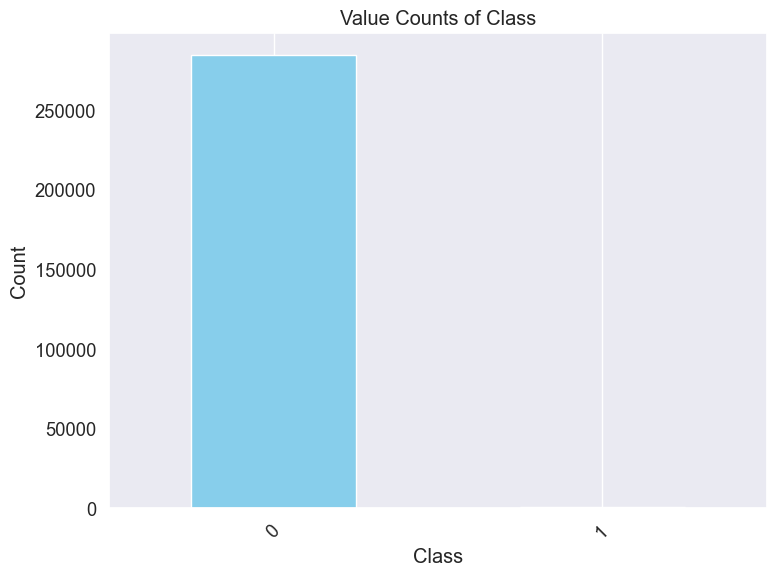

In [40]:
class_counts = df['Class'].value_counts()

# Creating a bar plot
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [41]:
nan = df.isna().sum()
nan

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [42]:
#Selecting feature column
feature_columns = df.drop(columns = 'Class')
# transforming it by using minmaxscaler
scaler = MinMaxScaler()
df1 = scaler.fit_transform(feature_columns)
df1

array([[9.35192337e-01, 7.66490419e-01, 8.81364903e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [9.78541955e-01, 7.70066651e-01, 8.40298490e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [9.35217023e-01, 7.53117667e-01, 8.68140819e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [9.90904812e-01, 7.64079694e-01, 7.81101998e-01, ...,
        4.16593177e-01, 3.12584864e-01, 2.64215395e-03],
       [9.54208999e-01, 7.72855742e-01, 8.49587129e-01, ...,
        4.18519535e-01, 3.15245157e-01, 3.89238944e-04],
       [9.49231759e-01, 7.65256401e-01, 8.49601462e-01, ...,
        4.16466371e-01, 3.13400843e-01, 8.44648509e-03]])

In [43]:
#combining the dataframe
df1 = pd.DataFrame(df1, columns = feature_columns.columns)

In [44]:
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,...,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030
284803,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,...,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965
284804,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,...,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642
284805,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,...,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389


In [45]:
X = df1
y = df['Class']

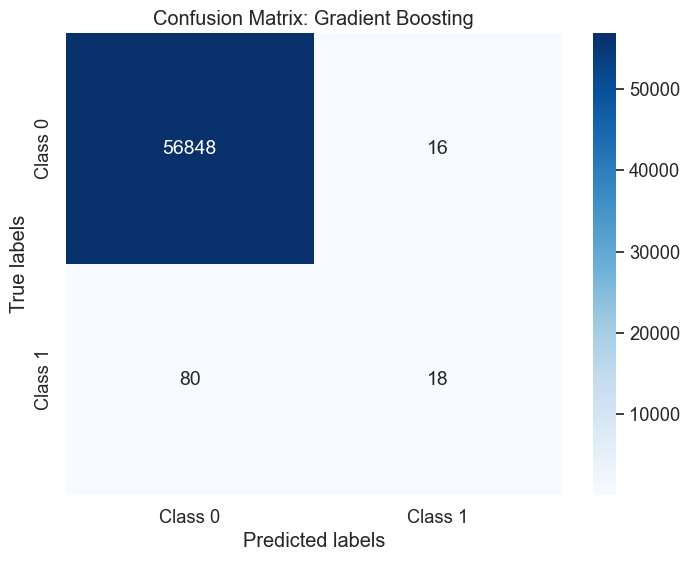

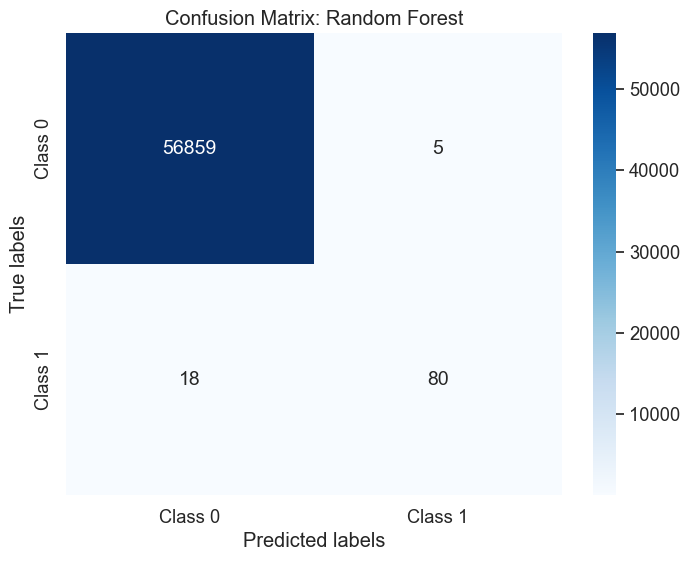

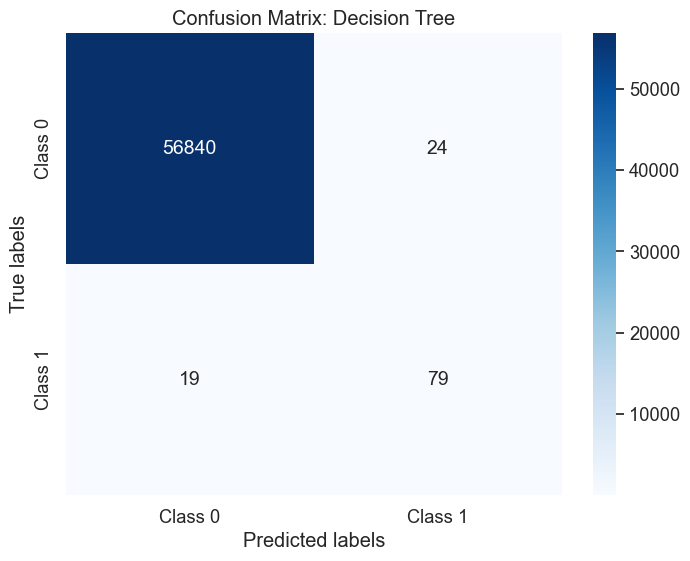

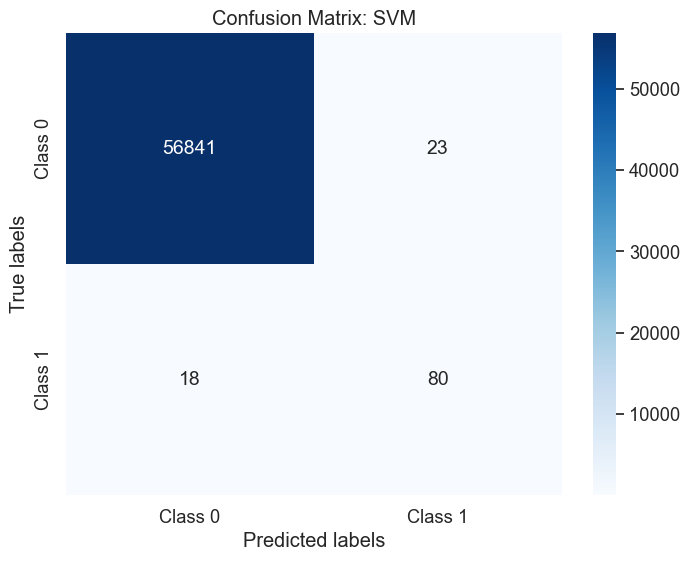

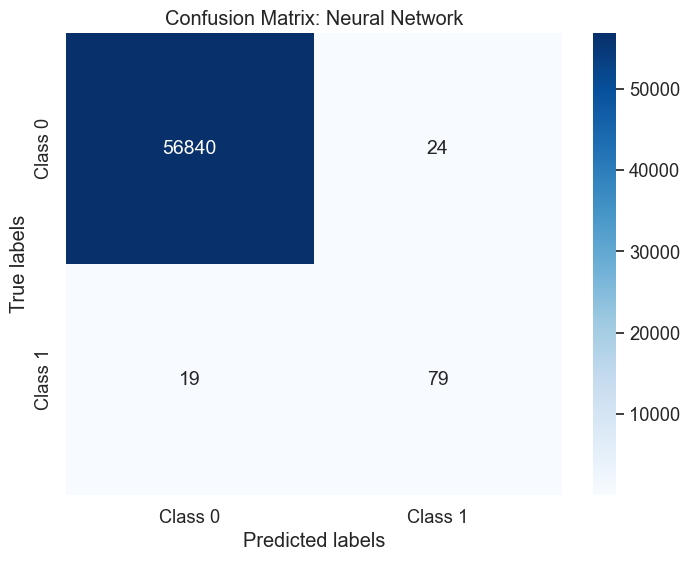

{'Gradient Boosting': {'Accuracy': 0.9983146659176293,
  'Precision': 0.5294117647058824,
  'Recall': 0.1836734693877551,
  'F1 Score': 0.27272727272727276},
 'Random Forest': {'Accuracy': 0.9995962220427653,
  'Precision': 0.9411764705882353,
  'Recall': 0.8163265306122449,
  'F1 Score': 0.8743169398907105},
 'Decision Tree': {'Accuracy': 0.9992451107756047,
  'Precision': 0.7669902912621359,
  'Recall': 0.8061224489795918,
  'F1 Score': 0.7860696517412936},
 'SVM': {'Accuracy': 0.9992802219023208,
  'Precision': 0.7766990291262136,
  'Recall': 0.8163265306122449,
  'F1 Score': 0.7960199004975125},
 'Neural Network': {'Accuracy': 0.9992451107756047,
  'Precision': 0.7669902912621359,
  'Recall': 0.8061224489795918,
  'F1 Score': 0.7860696517412936}}

In [18]:
def evaluate_models(X, y):
    # Splitting data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)
    
    # Initialize classifiers
    models = {
        'Gradient Boosting': GradientBoostingClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'SVM': SVC(),
        'Neural Network': MLPClassifier()
    }
    
    # Train and evaluate models
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, )
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
            
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.set(font_scale=1.2)  # Adjust font size for better visualization
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 14},
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title(f'Confusion Matrix: {name}')
        plt.show()
        
        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1

        

        
        }
    return results

# Example usage:
# Assuming X contains your feature data and y contains your target variable
# Replace X and y with your actual data
result = evaluate_models(X, y)
result

In [19]:
# undersampling
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = sampler.fit_resample(X, y)

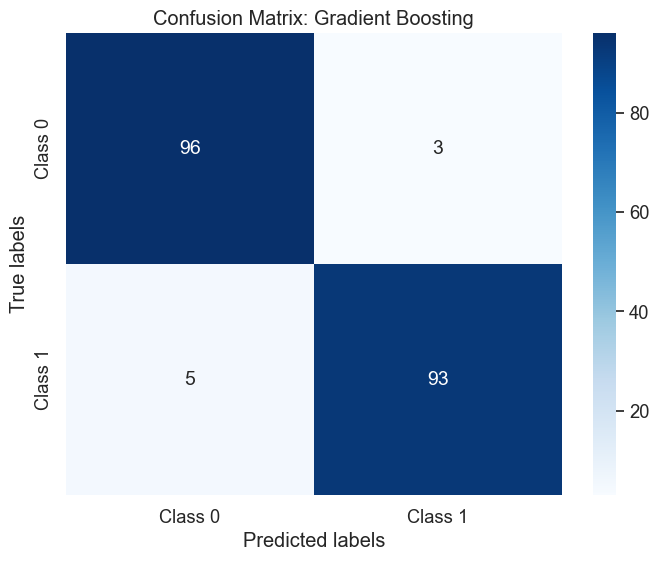

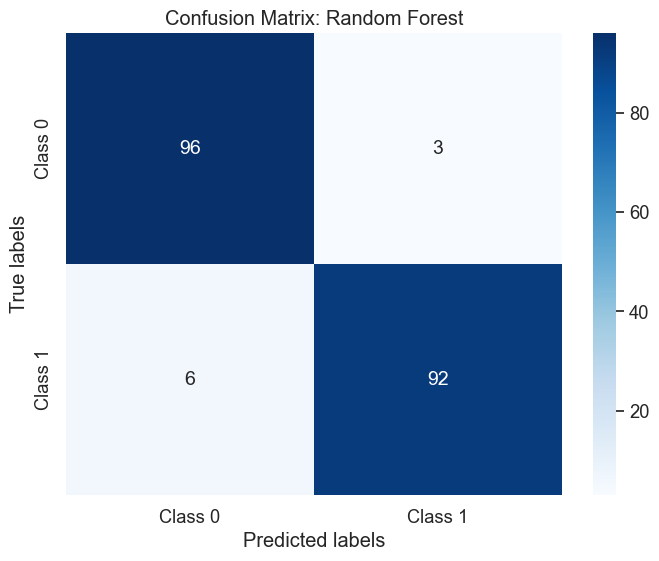

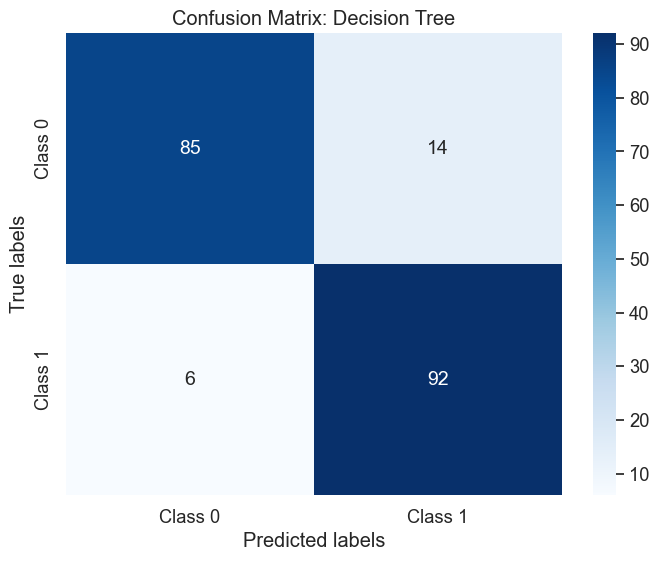

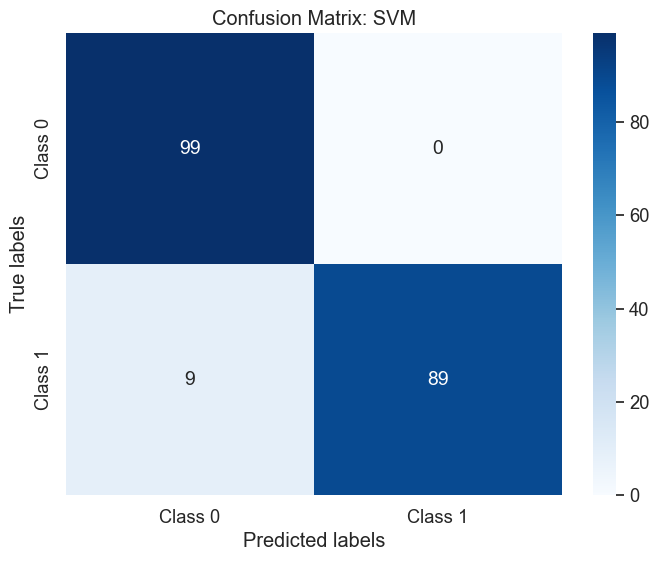

C:\Users\yuvis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


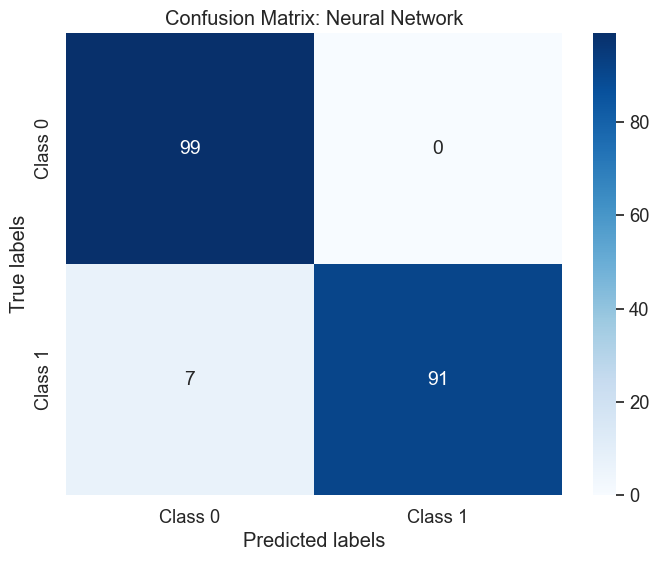

{'Gradient Boosting': {'Accuracy': 0.9593908629441624,
  'Precision': 0.96875,
  'Recall': 0.9489795918367347,
  'F1 Score': 0.9587628865979382},
 'Random Forest': {'Accuracy': 0.9543147208121827,
  'Precision': 0.968421052631579,
  'Recall': 0.9387755102040817,
  'F1 Score': 0.9533678756476685},
 'Decision Tree': {'Accuracy': 0.8984771573604061,
  'Precision': 0.8679245283018868,
  'Recall': 0.9387755102040817,
  'F1 Score': 0.9019607843137256},
 'SVM': {'Accuracy': 0.9543147208121827,
  'Precision': 1.0,
  'Recall': 0.9081632653061225,
  'F1 Score': 0.9518716577540107},
 'Neural Network': {'Accuracy': 0.9644670050761421,
  'Precision': 1.0,
  'Recall': 0.9285714285714286,
  'F1 Score': 0.962962962962963}}

In [20]:
evaluate_models(X_train_undersampled, y_train_undersampled)

In [21]:
#oversampling
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X, y)

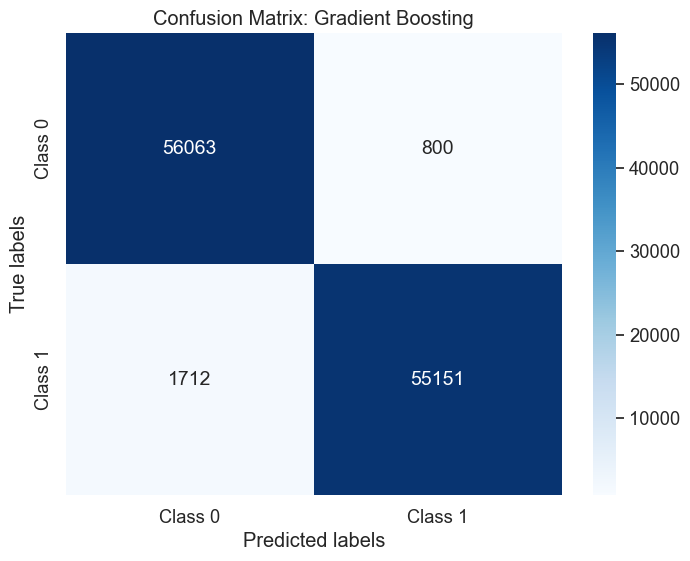

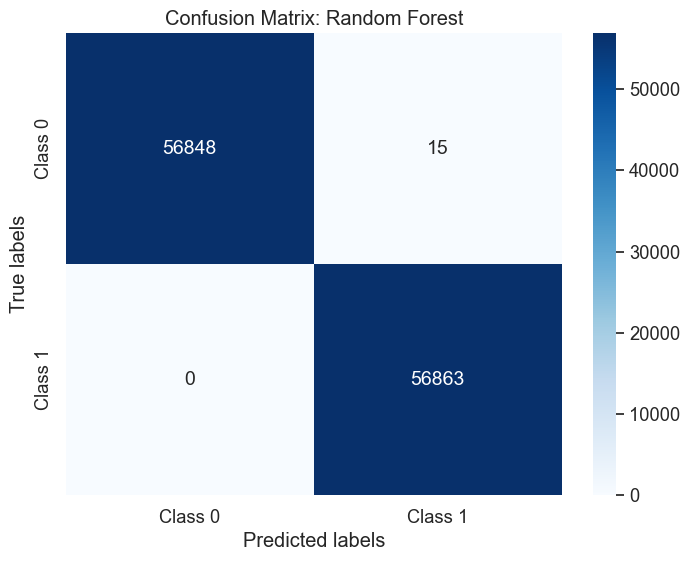

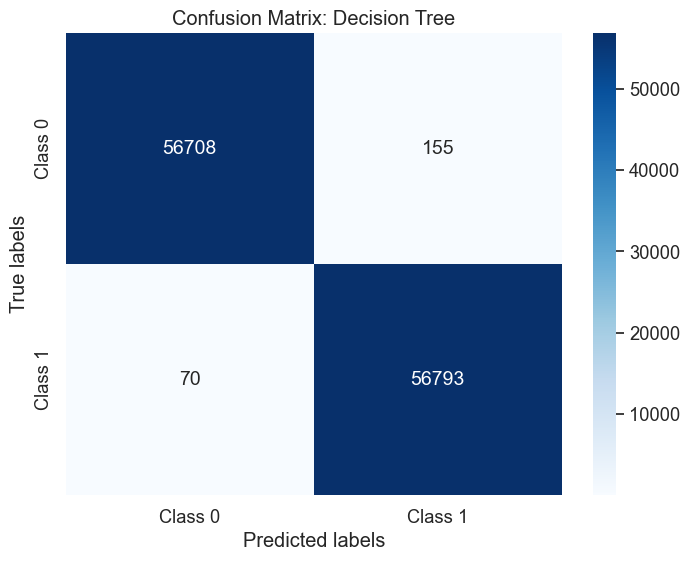

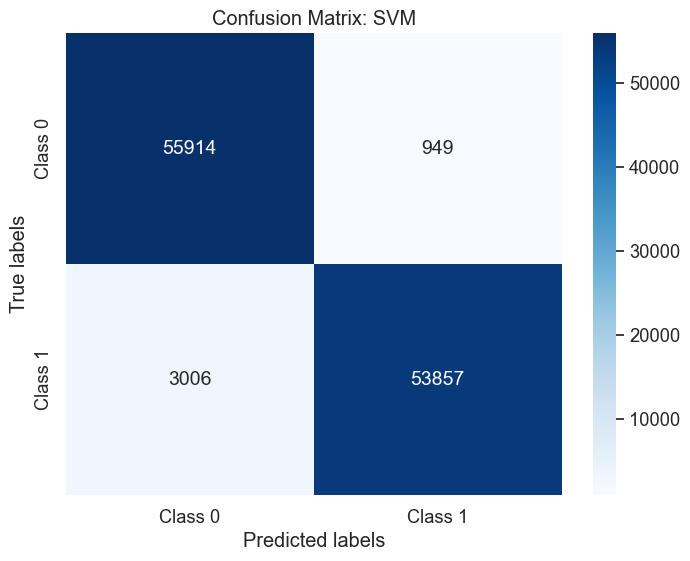

C:\Users\yuvis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


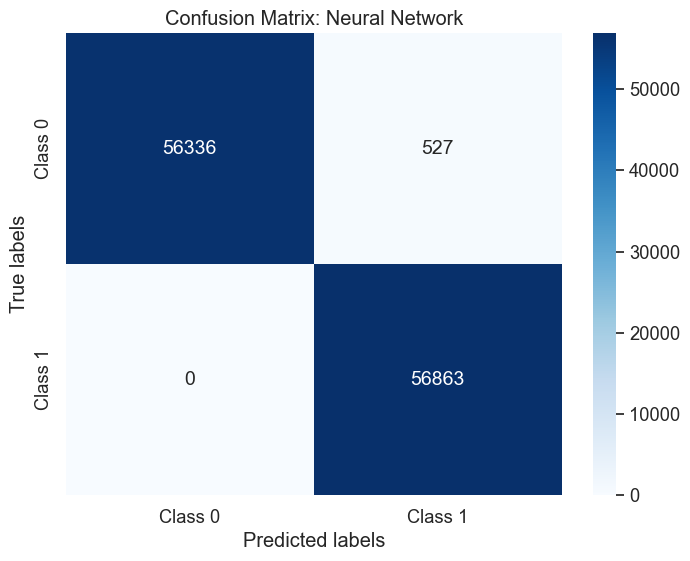

{'Gradient Boosting': {'Accuracy': 0.9779118231538962,
  'Precision': 0.985701774767207,
  'Recall': 0.96989254875754,
  'F1 Score': 0.977733260056376},
 'Random Forest': {'Accuracy': 0.9998681040395336,
  'Precision': 0.9997362776468933,
  'Recall': 1.0,
  'F1 Score': 0.9998681214337837},
 'Decision Tree': {'Accuracy': 0.9980215605930043,
  'Precision': 0.9972782187258552,
  'Recall': 0.9987689710356471,
  'F1 Score': 0.998023038194902},
 'SVM': {'Accuracy': 0.9652234317570301,
  'Precision': 0.982684377622888,
  'Recall': 0.9471360990450732,
  'F1 Score': 0.9645828296125155},
 'Neural Network': {'Accuracy': 0.9953660552556144,
  'Precision': 0.9908172155427775,
  'Recall': 1.0,
  'F1 Score': 0.9953874296517378}}

In [23]:
evaluate_models(X_train_oversampled, y_train_oversampled)

In [46]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize decision tree classifiers with different depths
depths = [1, 3, 5, 10]
for depth in depths:
    # Create decision tree classifier with varying depths
    clf = DecisionTreeClassifier(max_depth=depth)

    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Evaluate performance on training and validation sets
    train_pred = clf.predict(X_train)
    val_pred = clf.predict(X_test)

    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, train_pred)
    val_accuracy = accuracy_score(y_test, val_pred)

    print(f"Decision Tree with max depth {depth}:")
    print(f"Training accuracy: {train_accuracy:.4f}")
    print(f"Validation accuracy: {val_accuracy:.4f}")
    print()


Decision Tree with max depth 1:
Training accuracy: 0.9991
Validation accuracy: 0.9991

Decision Tree with max depth 3:
Training accuracy: 0.9994
Validation accuracy: 0.9993

Decision Tree with max depth 5:
Training accuracy: 0.9996
Validation accuracy: 0.9995

Decision Tree with max depth 10:
Training accuracy: 0.9998
Validation accuracy: 0.9995



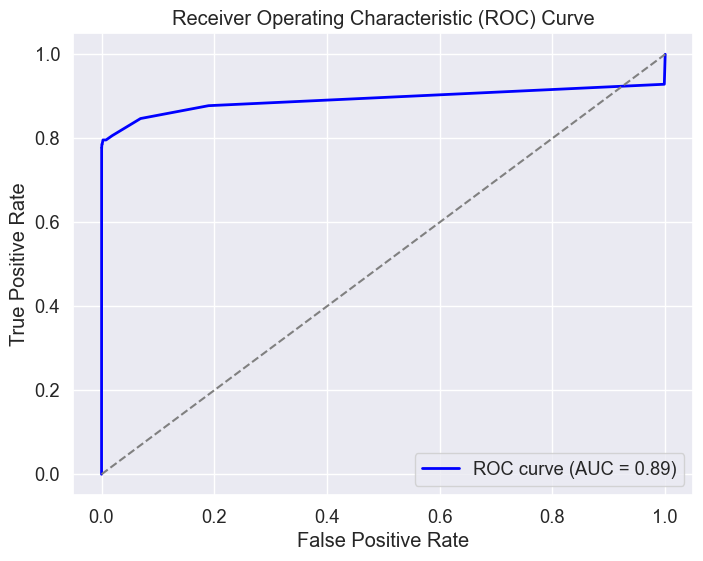

In [50]:
from sklearn.metrics import roc_curve, auc
# Predict probabilities for the test set
probas = clf.predict_proba(X_test_undersampled)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line representing random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()